---
Lógica Computacional TP1.Exercício2
======================
##### G01 - Bruno Dias da Gião A96544, João Luis da Cruz Pereira A95375, David Alberto Agra A95726


---

## Exercício 2 - Enunciado

2. Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido .  O grafo tem de ser ligado: entre cada par de nodos $\langle n_1,n_2 \rangle$ tem de existir um caminho $n_1 \leadsto n_2$ e um caminho $n_2\leadsto n_1$.
    1. Gerar aleatoriamente o grafo com  $N \in\{8..15\}$  nodos e com ramos verificando:
        1. Cada nodo tem um número aleatório de descendentes $d\in\{0 .. 3\}\,$ cujos destinos são também gerados aleatoriamente. 
        2. Se existirem “loops”  ou destinos repetidos, deve-se gerar outro grafo.
    2. Pretende-se fazer manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

---

## Exercício 2 - Solução

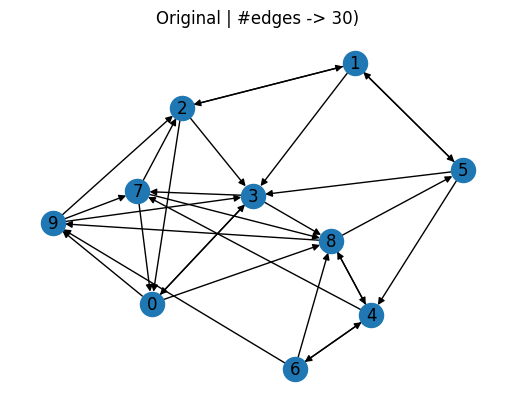

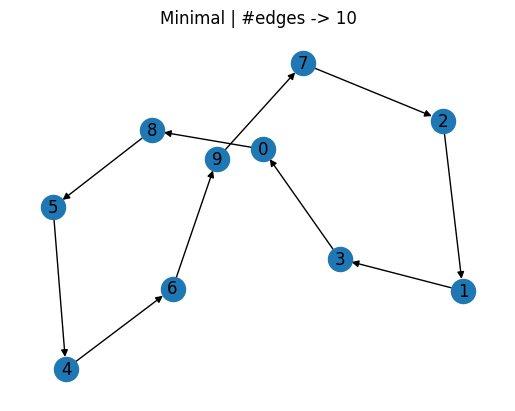

In [55]:
from functools import reduce
from ortools.linear_solver import pywraplp
import networkx as nx
import random

# Create an empty directed graph with 10 nodes
N = 20
max_neighbors = 3
G = nx.DiGraph()
G.add_nodes_from(range(N))
while not nx.is_strongly_connected(G):
    G = nx.DiGraph()
    G.add_nodes_from(range(N))
    nodes = list(G.nodes())
    for node in nodes:
        neighbors = set(G.neighbors(node))
        while len(neighbors) < max_neighbors:
            target_node = random.choice(nodes)
            if target_node != node and target_node not in neighbors:
                G.add_edge(node, target_node)
                neighbors.add(target_node)

solver = pywraplp.Solver.CreateSolver('SCIP')

edge_vars = {}

for u, v in G.edges():
    edge_vars[u, v] = solver.IntVar(0, 1, f'edge_{u}_{v}')

for i in range(N):
    for j in range(N):
        if i != j:
            paths = nx.all_simple_edge_paths(G, i, j)
            const = reduce(lambda x,y: x or y, 
                           (solver.Sum(edge_vars[x] for x in k)==0 for k in paths))
            solver.Add(const)
            
        
solver.Maximize(solver.Sum(edge_vars.values()))
            
s = solver.Solve()

import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.title(f'Original | #edges -> {len(edge_vars)})')
nx.draw(G, pos, with_labels=True, node_size=300)
plt.show()

for u, v in edge_vars:
    if edge_vars[u, v].solution_value() == 1:
        G.remove_edge(u, v)
plt.title(f'Minimal | #edges -> {len(G.edges())}')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300)
plt.show()


### Exercício 2 - Código

### Exercício 2 - Testes